In [1]:
# Autoreload extension
%load_ext autoreload
%autoreload 2


In [2]:
import torch
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib as mpl

from causaldynamics.utils import set_rng_seed
from causaldynamics.initialization import initialize_weights, initialize_biases, initialize_x
from causaldynamics.scm import create_scm_graph, get_root_nodes_mask, GNR
from causaldynamics.mlp import propagate_mlp
from causaldynamics.systems import solve_system, solve_random_systems
from causaldynamics.plot import plot_trajectories, animate_3d_trajectories, plot_scm



In [ ]:
# This takes a while to run...
# Set parameters
set_rng_seed(1337)
num_nodes = 2
num_timesteps = 1000
dimensions = 3

# Sample the SCM, all hyperoparameters and propagate the Lorenz attractor through the SCM
A = GNR(num_nodes).generate()
W = initialize_weights(num_nodes, dimensions)
b = initialize_biases(num_nodes, dimensions)
init = solve_system(num_timesteps, num_nodes, "Lorenz")
init_s = initialize_x(init, A, standardize=True)
x = propagate_mlp(A, W, b, init=init)
x_s = propagate_mlp(A, W, b, init=init_s, standardize=True)
root_nodes = get_root_nodes_mask(A)
da = xr.DataArray(x, dims=['time', 'node', "dim"])
da_s = xr.DataArray(x_s, dims=['time', 'node', "dim"])

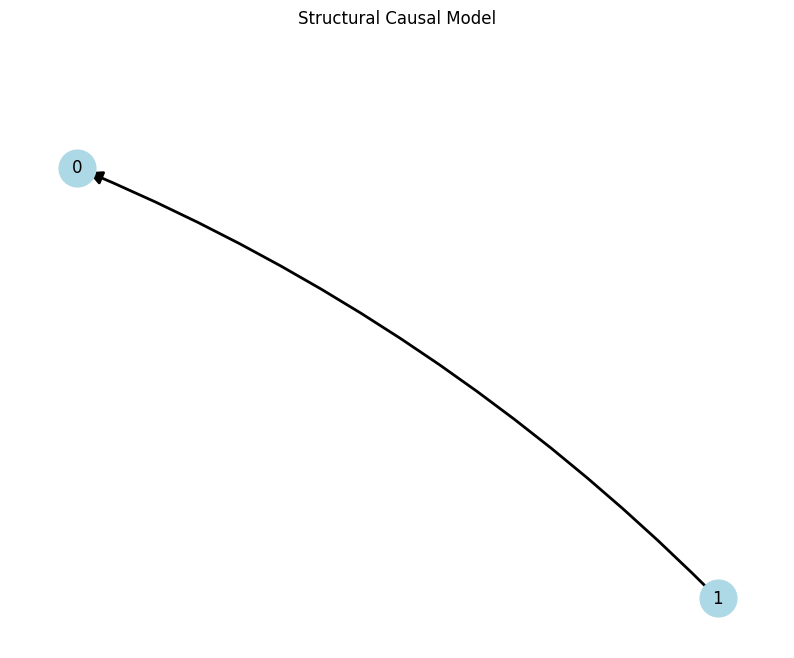

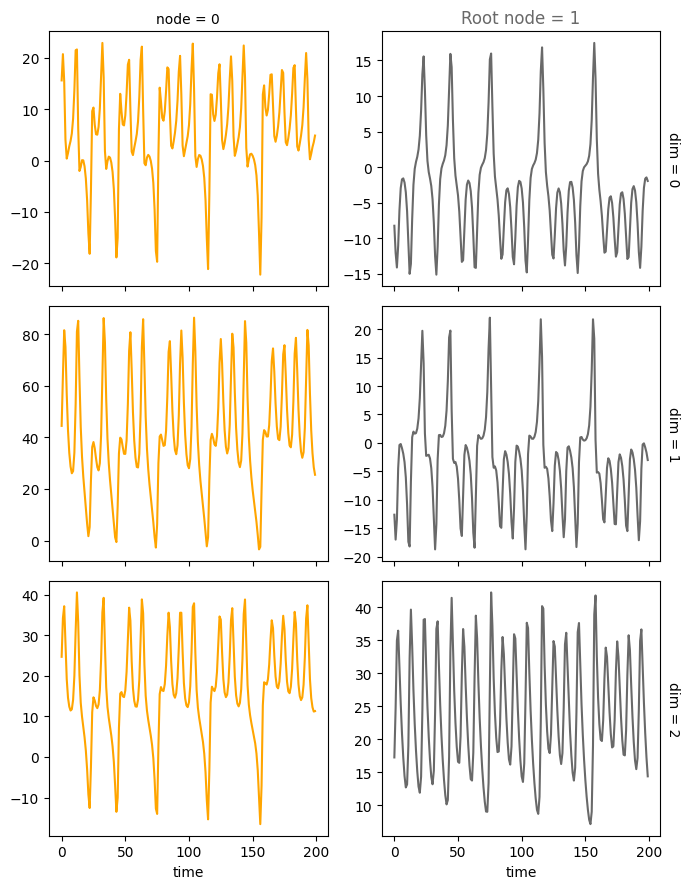

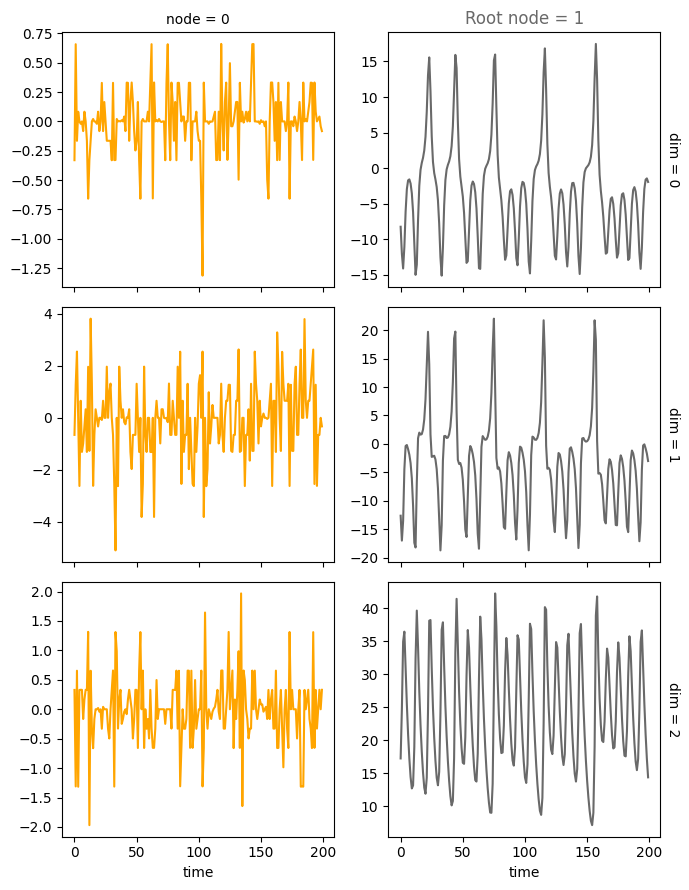

In [25]:
### Visualize the results
mpl.rcParams['animation.embed_limit'] = 50 * 1024**2  # 50MB

# Plot the SCM graph
plot_scm(G=create_scm_graph(A))
plt.show()

# Plot the trajectories
plot_trajectories(da.isel(time=slice(0, 1000, 5)), root_nodes, sharey=False)
plot_trajectories(da_s.isel(time=slice(0, 1000, 5)), root_nodes, sharey=False)
plt.show()

# # Animate the trajectories
# anim = animate_3d_trajectories(da, frame_skip=5, rotation_speed=0.2, rotate=True , show_history=True, plot_type='subplots', root_nodes=root_nodes)
# display(anim)


In [91]:
# This takes a while to run...
# Set parameters
set_rng_seed(1337)
num_nodes = 5
num_timesteps = 1000
dimensions = 3

# Sample the SCM, all hyperoparameters and propagate the Lorenz attractor through the SCM
# A = GNR(num_nodes).generate()
A = torch.tensor([[0,0,0,0,0],
                  [1,0,0,0,0],
                  [0,1,0,0,0],
                  [0,0,1,0,0],
                  [0,0,0,1,0]])
W = initialize_weights(num_nodes, dimensions)
b = initialize_biases(num_nodes, dimensions)
init = solve_system(num_timesteps, num_nodes, "Lorenz")
init_s = initialize_x(init, A, standardize=True)
x = propagate_mlp(A, W, b, init=init)
x_s = propagate_mlp(A, W, b, init=init_s)
root_nodes = get_root_nodes_mask(A)
da = xr.DataArray(x, dims=['time', 'node', "dim"])
da_s = xr.DataArray(x_s, dims=['time', 'node', "dim"])

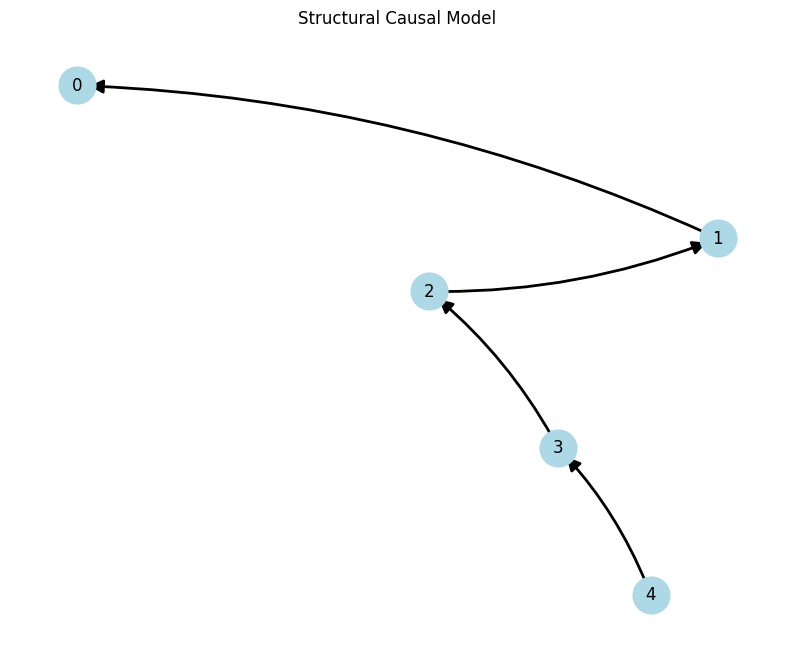

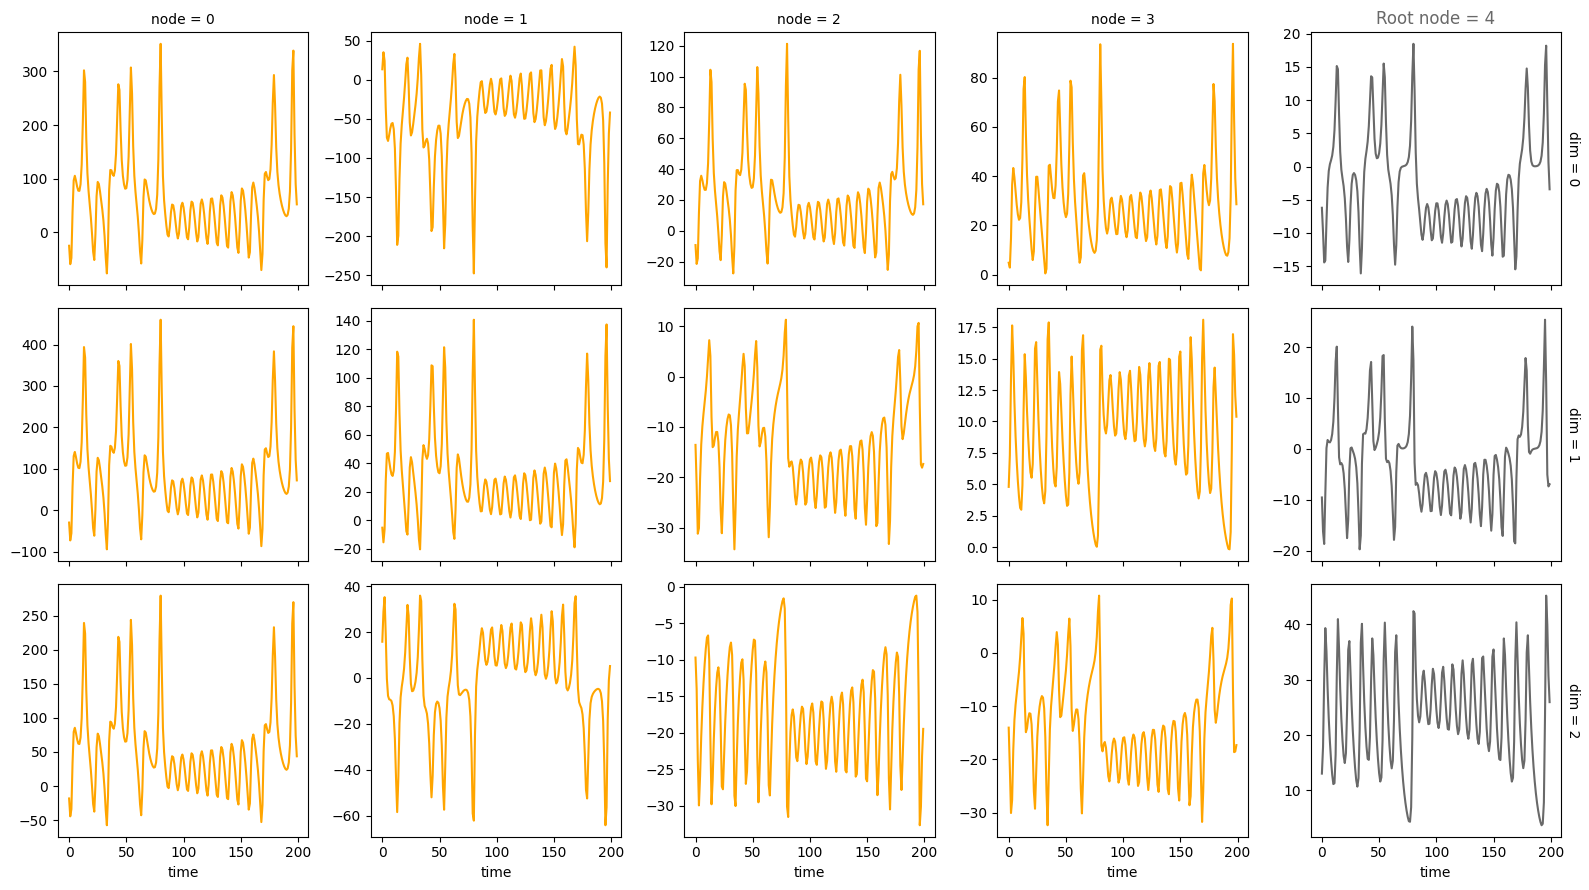

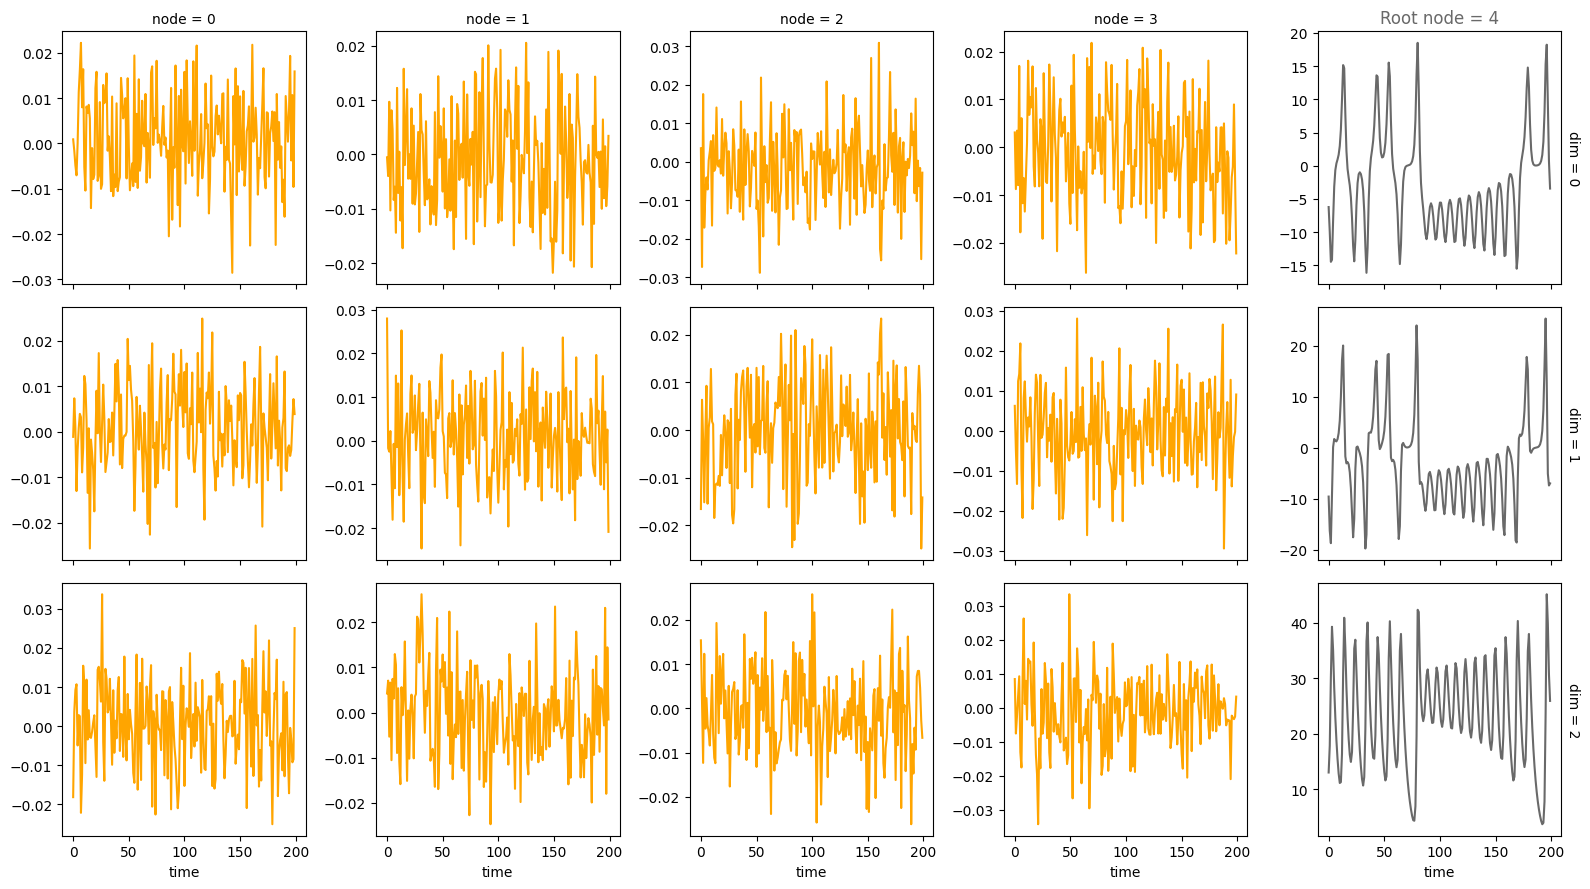

In [88]:
### Visualize the results
mpl.rcParams['animation.embed_limit'] = 50 * 1024**2  # 50MB

# Plot the SCM graph
plot_scm(G=create_scm_graph(A))
plt.show()

# Plot the trajectories
plot_trajectories(da.isel(time=slice(0, 1000, 5)), root_nodes, sharey=False)
plot_trajectories(da_s.isel(time=slice(0, 1000, 5)), root_nodes, sharey=False)
plt.show()

# # Animate the trajectories
# anim = animate_3d_trajectories(da, frame_skip=5, rotation_speed=0.2, rotate=True , show_history=True, plot_type='subplots', root_nodes=root_nodes)
# display(anim)


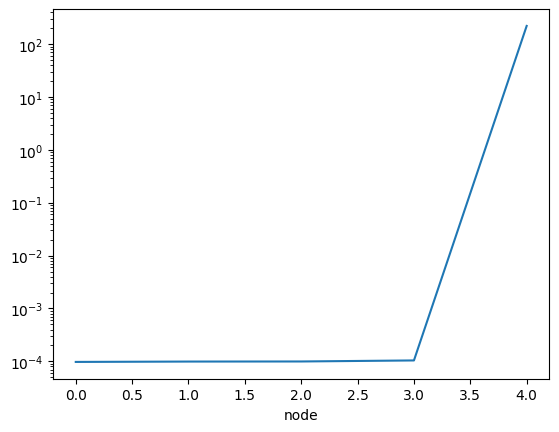

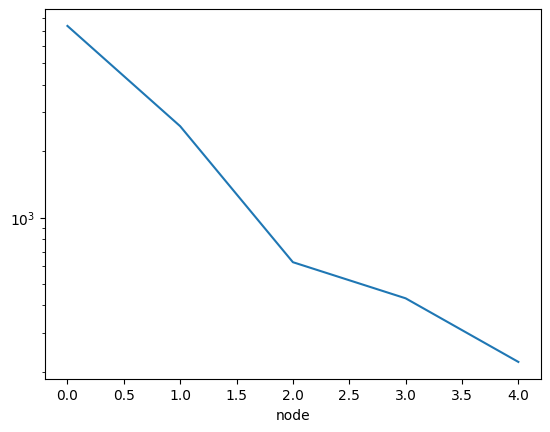

In [89]:
da_s.var(dim=['time', 'dim']).plot(x='node', yscale='log')
plt.show()
da.var(dim=['time', 'dim']).plot(x='node', yscale='log')
plt.show()

In [79]:
from causaldynamics.initialization import initialize_x
# This takes a while to run...
# Set parameters
set_rng_seed(24)
num_nodes = 10
num_timesteps = 1000
dimensions = 3

# Sample the SCM, all hyperoparameters and propagate the Lorenz attractor through the SCM
A = GNR(num_nodes).generate()
# A = torch.tensor([[0,0,0,0,0],
#                   [1,0,0,0,0],
#                   [0,1,0,0,0],
#                   [0,0,1,0,0],
#                   [0,0,0,1,0]])
W = initialize_weights(num_nodes, dimensions)
b = initialize_biases(num_nodes, dimensions)
init = solve_system(num_timesteps, num_nodes, "Lorenz")
init_s = initialize_x(init, A, standardize=True)
x = propagate_mlp(A, W, b, init=init)
x_s = propagate_mlp(A, W, b, init=init_s, standardize=True)
root_nodes = get_root_nodes_mask(A)
da = xr.DataArray(x, dims=['time', 'node', "dim"])
da_s = xr.DataArray(x_s, dims=['time', 'node', "dim"])

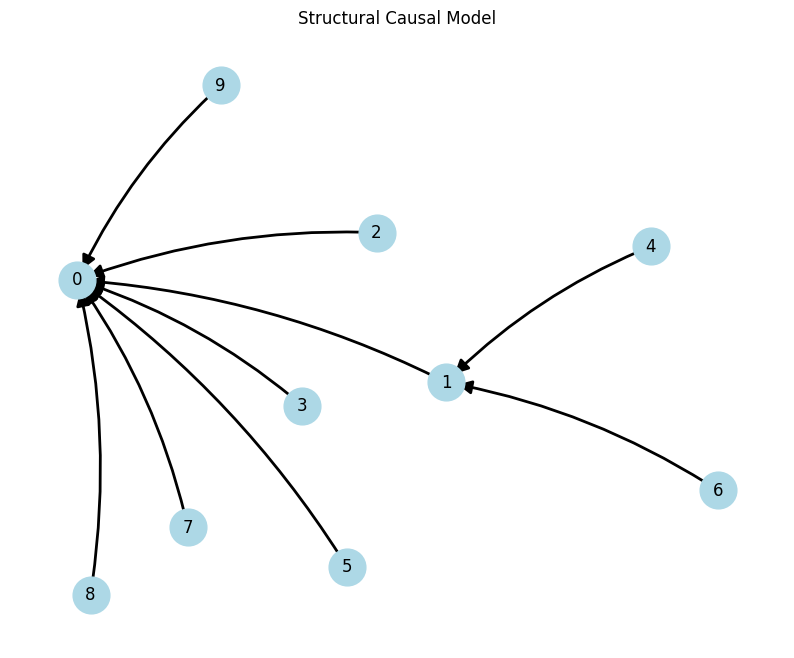

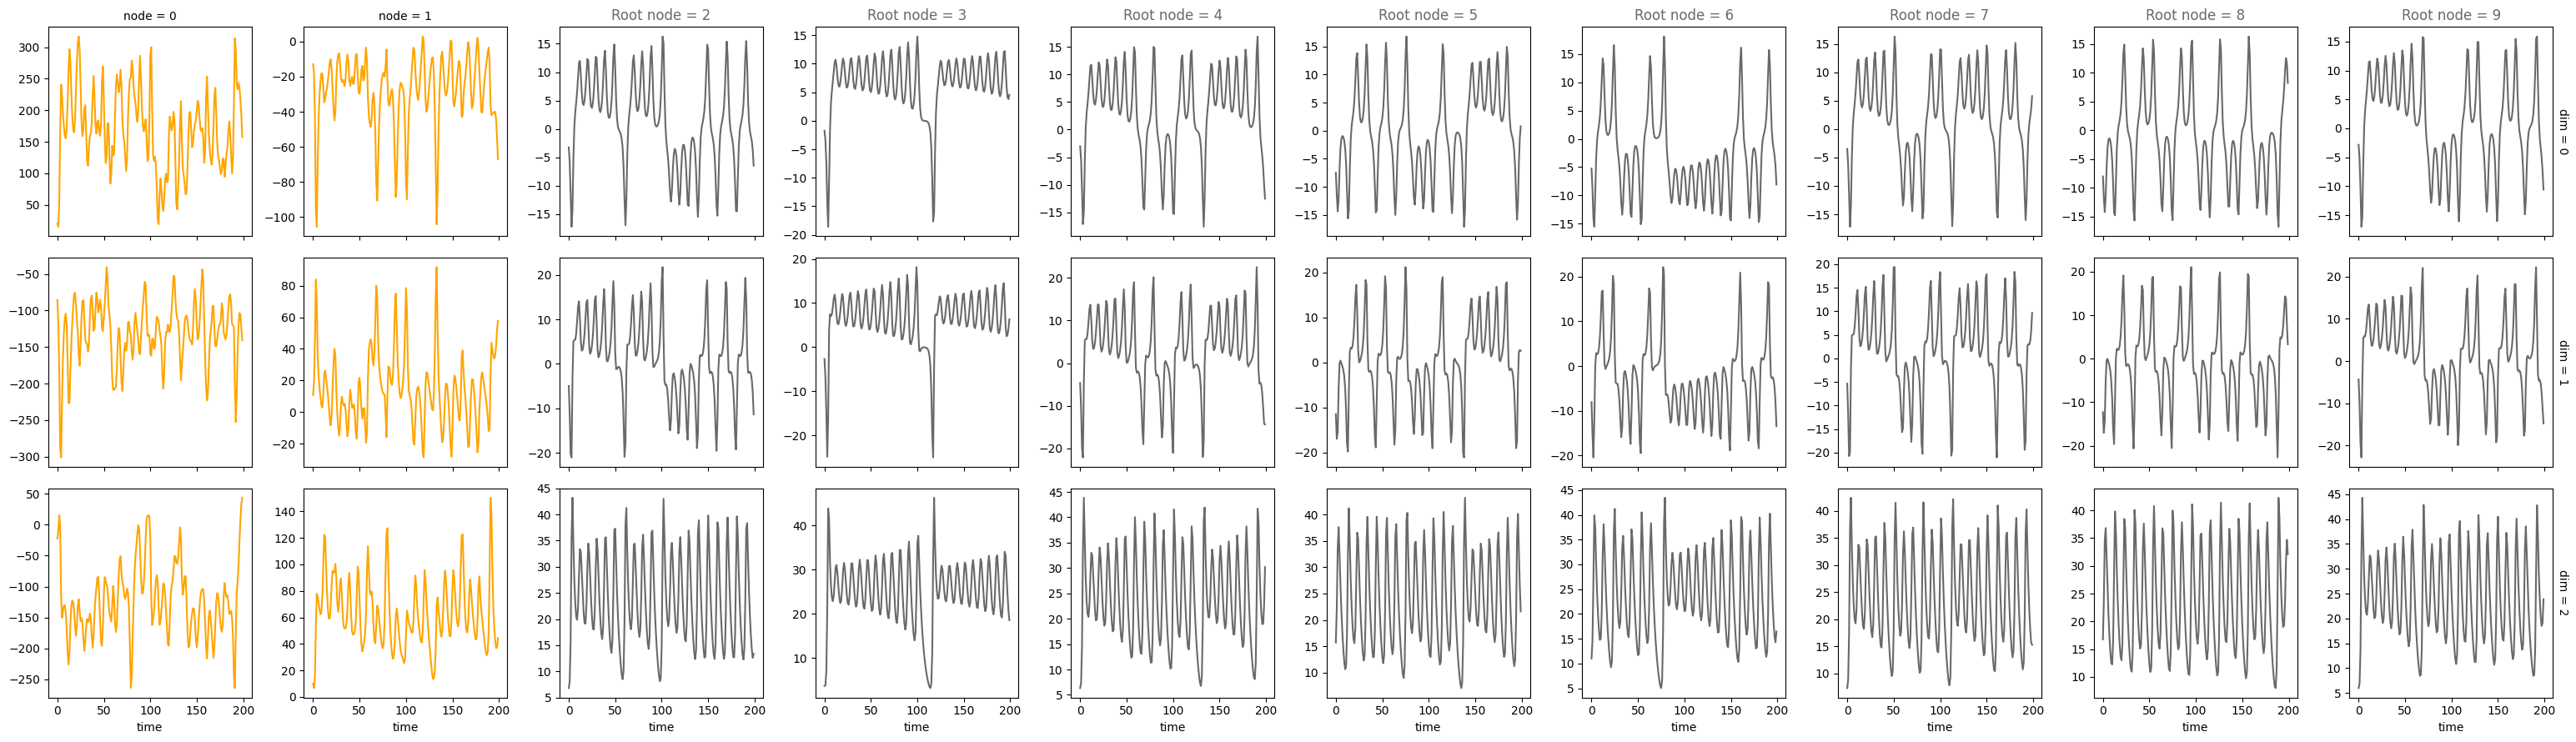

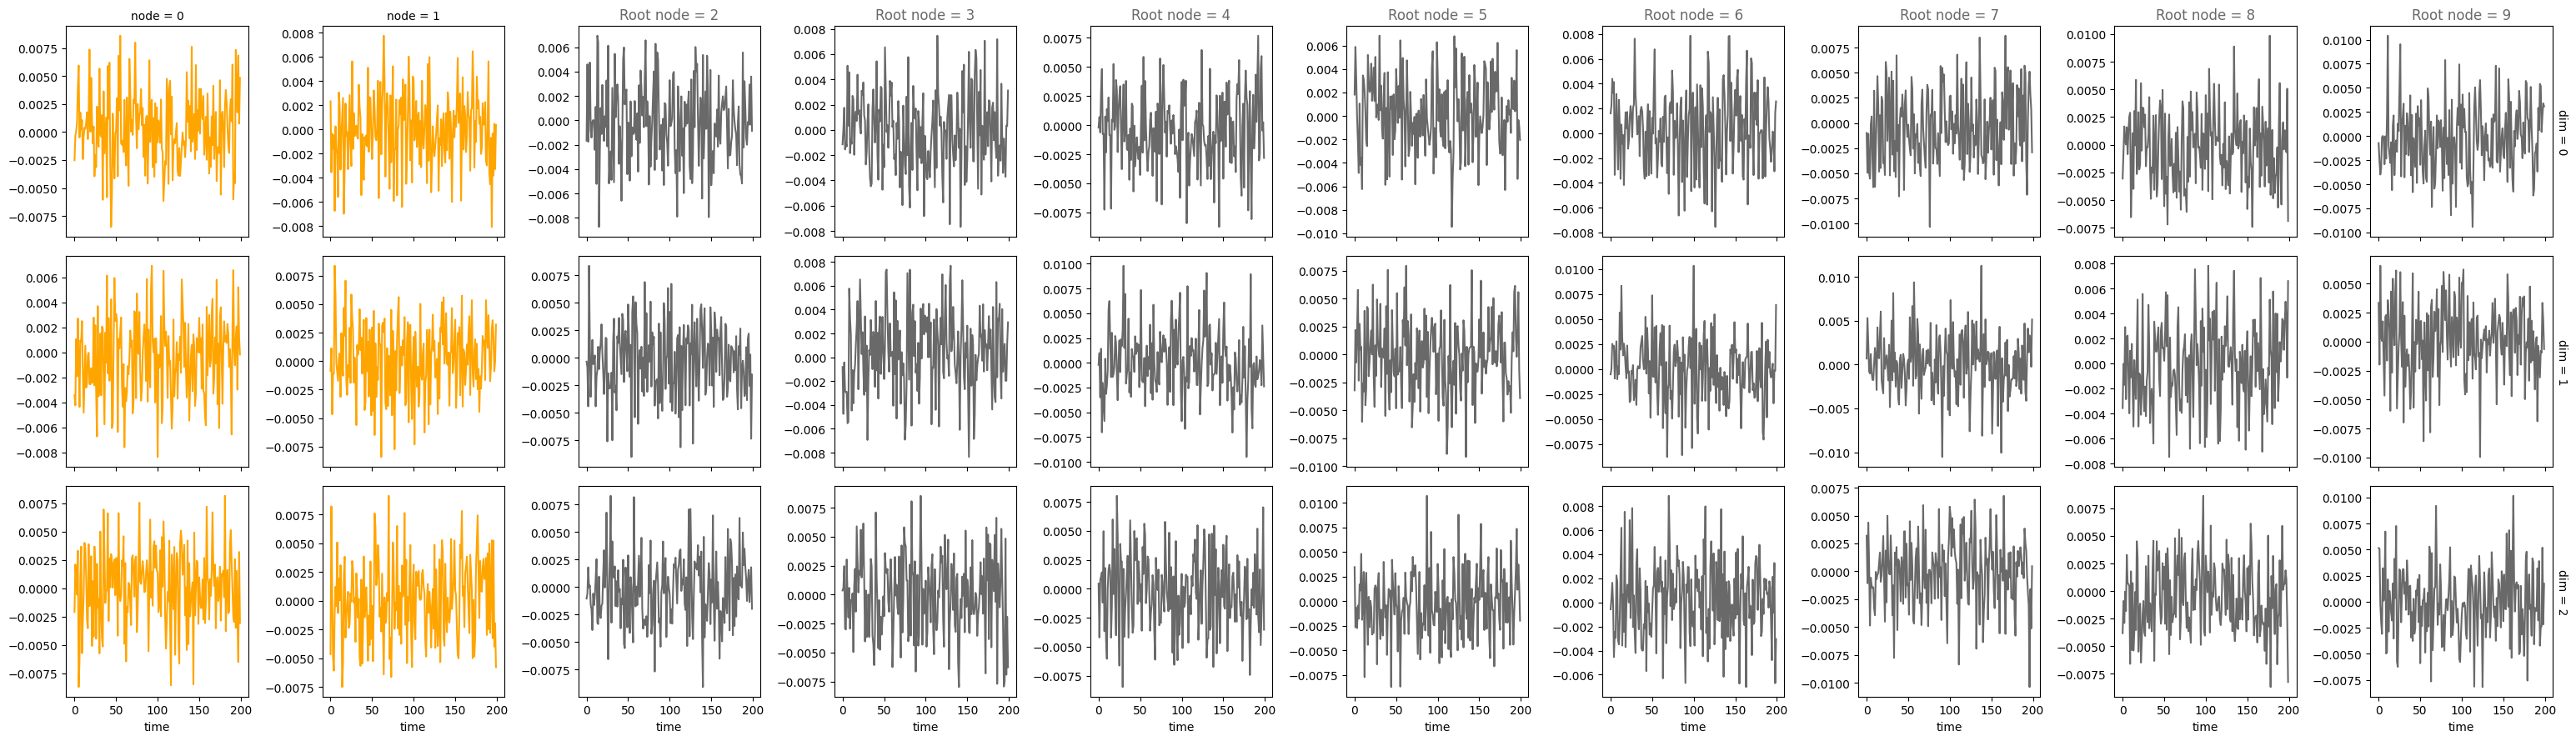

In [80]:
### Visualize the results
mpl.rcParams['animation.embed_limit'] = 50 * 1024**2  # 50MB

# Plot the SCM graph
plot_scm(G=create_scm_graph(A))
plt.show()

# Plot the trajectories
plot_trajectories(da.isel(time=slice(0, 1000, 5)), root_nodes, sharey=False)
plot_trajectories(da_s.isel(time=slice(0, 1000, 5)), root_nodes, sharey=False)
plt.show()

# # Animate the trajectories
# anim = animate_3d_trajectories(da, frame_skip=5, rotation_speed=0.2, rotate=True , show_history=True, plot_type='subplots', root_nodes=root_nodes)
# display(anim)


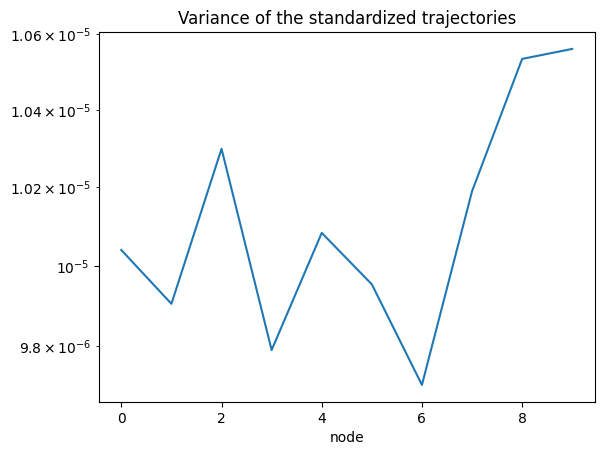

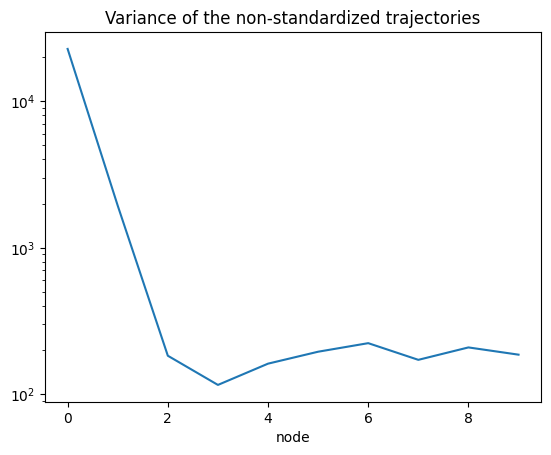

In [86]:
da_s.var(dim=['time', 'dim']).plot(x='node', yscale='log')
plt.title("Variance of the standardized trajectories")
plt.show()
da.var(dim=['time', 'dim']).plot(x='node', yscale='log')
plt.title("Variance of the non-standardized trajectories")
plt.show()